Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

Loading the dataset

In [4]:
match=pd.read_csv(r"D:\dataset\matches.csv")

delivery=pd.read_csv(r"D:\dataset\deliveries.csv")

displaying the first 5 rows in match dataset

In [5]:
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


Inference:
The first match back in 2008 was played between KKR and RCB. KKR has won the match at M Chinnaswamy Stadium and the Player of the Match was BB McCullum. The match result was decided by runs.

displaying the first five rows in delivery dataset

In [6]:
delivery.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [7]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [8]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [9]:
#List of all the participating teams
all_teams = match['team1'].tolist() + match['team2'].tolist()
all_teams = list(set(all_teams))
all_teams

['Kolkata Knight Riders',
 'Delhi Daredevils',
 'Chennai Super Kings',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Delhi Capitals',
 'Sunrisers Hyderabad',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Rising Pune Supergiant',
 'Kings XI Punjab',
 'Royal Challengers Bangalore']

 INFERENCE:
 list of teams that played between the period 2008 to 2020.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='eliminator', ylabel='count'>

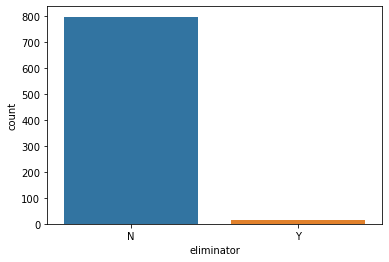

In [10]:
#Eliminator
match['eliminator'].value_counts()

#graphical view
sns.countplot('eliminator', data=match)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'M Chinnaswamy Stadium'),
  Text(1, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(2, 0, 'Feroz Shah Kotla'),
  Text(3, 0, 'Wankhede Stadium'),
  Text(4, 0, 'Eden Gardens'),
  Text(5, 0, 'Sawai Mansingh Stadium'),
  Text(6, 0, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(7, 0, 'MA Chidambaram Stadium, Chepauk'),
  Text(8, 0, 'Dr DY Patil Sports Academy'),
  Text(9, 0, 'Newlands'),
  Text(10, 0, "St George's Park"),
  Text(11, 0, 'Kingsmead'),
  Text(12, 0, 'SuperSport Park'),
  Text(13, 0, 'Buffalo Park'),
  Text(14, 0, 'New Wanderers Stadium'),
  Text(15, 0, 'De Beers Diamond Oval'),
  Text(16, 0, 'OUTsurance Oval'),
  Text(17, 0, 'Brabourne Stadium'),
  Text(18, 0, 'Sardar Patel Stadium, Motera'),
  Text(19, 0, 'Barabati Stadium'),
  Text(20, 0, 'Vidarbha Cricket Association Stadium, Ja

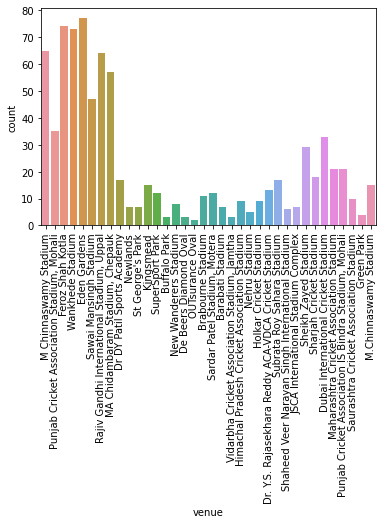

In [11]:
#Number of matches per venue
sns.countplot('venue', data=match)
plt.xticks(rotation='vertical')

Eden Gardens is the fan-favourite ground of IPL, nearly 80 matches have been hosted there.

<AxesSubplot:>

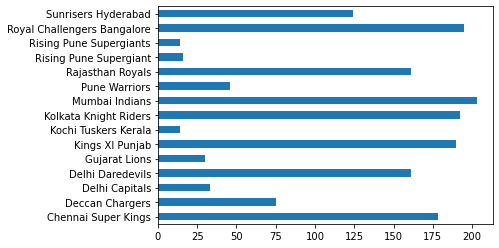

In [12]:
#Matches per team
x = match['team1'].value_counts()
y = match['team2'].value_counts()
(x+y).plot(kind='barh')

INFERENCE:
Mumbai Indians played the highest number of matches in the IPL.

In [13]:
#Match won by each team
x=pd.DataFrame({"Winner":match['winner']}).value_counts()
print(x)

Winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Kolkata Knight Riders'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Daredevils'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Rajasthan Royals'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Deccan Chargers'),
  Text(7, 0, 'Mumbai Indians'),
  Text(8, 0, 'Pune Warriors'),
  Text(9, 0, 'Kochi Tuskers Kerala'),
  Text(10, 0, 'Sunrisers Hyderabad'),
  Text(11, 0, 'Rising Pune Supergiants'),
  Text(12, 0, 'Gujarat Lions'),
  Text(13, 0, 'Rising Pune Supergiant'),
  Text(14, 0, 'Delhi Capitals')])

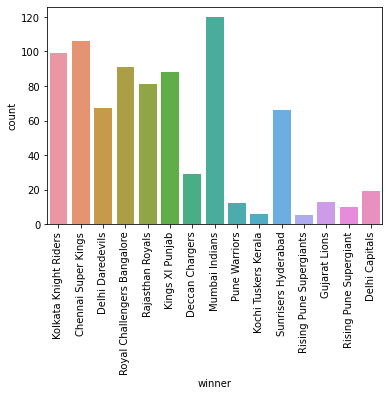

In [14]:
sns.countplot('winner', data=match)
plt.xticks(rotation='vertical')

Mumbai Indians win the highest number of matches followed by CSK and other teams.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


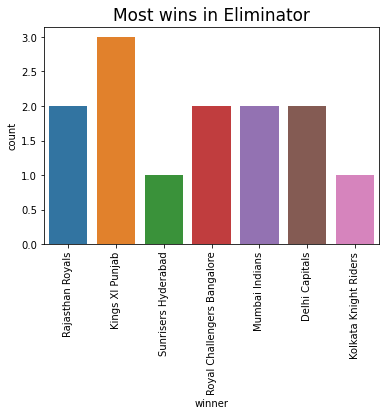

In [15]:
#Most win in eliminator
sns.countplot(match['winner'][match['eliminator']=='Y'],data=match)
plt.title("Most wins in Eliminator",fontsize=17)
plt.xticks(rotation=90)
plt.show()

Top 5 Players with the Highest Number of Man of the Match Awards

AB de Villiers    23
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64


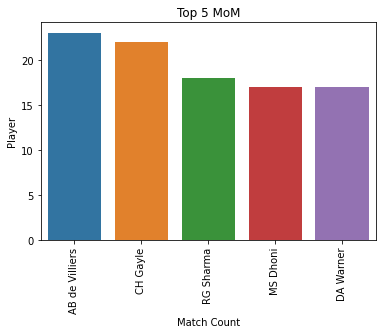

In [16]:
temp_data=match['player_of_match'].value_counts().head()
print(temp_data)
#sns.barplot(x=data['player_of_match'].value_counts().head().index,y=data['player_of_match'].value_counts().head().values,data=data)
sns.barplot(x=temp_data.index,y=temp_data.values,data=match)

plt.title("Top 5 MoM")
plt.xticks(rotation=90)
plt.xlabel("Match Count")
plt.ylabel("Player")
plt.show()

In [17]:
#About delivery
delivery.shape

(193468, 18)

The top 10 batsmen from the delivery dataset and summed up their runs. 

In [18]:
top_batsman=delivery.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs', ascending=False).head(10)

We plot the information into a graph.

<AxesSubplot:xlabel='batsman'>

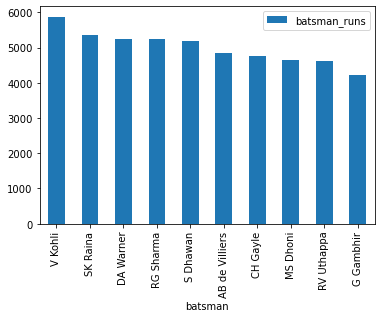

In [19]:
top_batsman.set_index('batsman', inplace=True)
top_batsman.plot(kind='bar')

INFERENCE:
King Kohli is at the top followed by Suresh Raina and other batsmen.

The Bowler Who Has Given the Highest Number of Runs

In [20]:
delivery.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)

,bowler,total_runs
276,PP Chawla,4330
133,Harbhajan Singh,4038
6,A Mishra,3913
99,DJ Bravo,3869
281,R Ashwin,3756
396,UT Yadav,3672
293,RA Jadeja,3515
350,SL Malinga,3486
264,P Kumar,3342
57,B Kumar,3333


<AxesSubplot:xlabel='batting_team'>

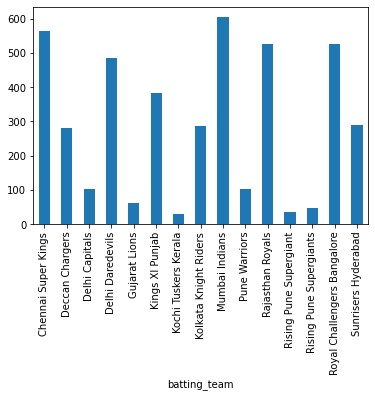

In [21]:
mask=delivery['bowler']=='PP Chawla'
delivery[mask].groupby('batting_team')['total_runs'].agg('sum').plot(kind='bar')

Over-wise Batting Performance of Each Team in the IPL (2008–2020)

In [22]:
delivery6=delivery[mask]
delivery6=delivery6[['batting_team','over','batsman_runs']]

In [23]:
x=delivery6.pivot_table(values='batsman_runs', index='batting_team', columns='over', aggfunc='count')

<AxesSubplot:xlabel='over', ylabel='batting_team'>

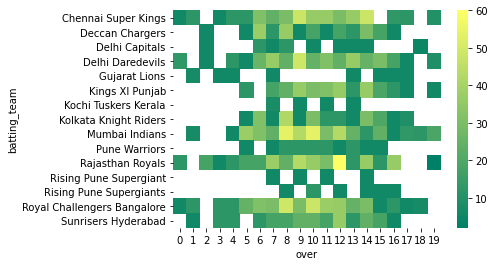

In [24]:
sns.heatmap(x, cmap='summer')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'run out'),
  Text(2, 0, 'bowled'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'retired hurt'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'caught and bowled'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

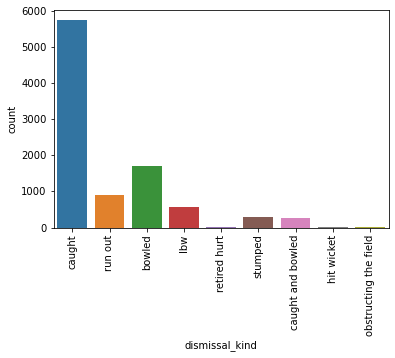

In [25]:
sns.countplot('dismissal_kind', data=delivery)
plt.xticks(rotation='vertical')

In [26]:
mask1=delivery['dismissal_kind']=='caught'
mask2=delivery['dismissal_kind']=='bowled'
mask3=delivery['dismissal_kind']=='lbw'
mask4=delivery['dismissal_kind']=='caught and bowled'
mask5=delivery['dismissal_kind']=='stumped'

new_del=delivery[mask1 | mask2 | mask3 | mask4 | mask5]

<AxesSubplot:xlabel='bowler'>

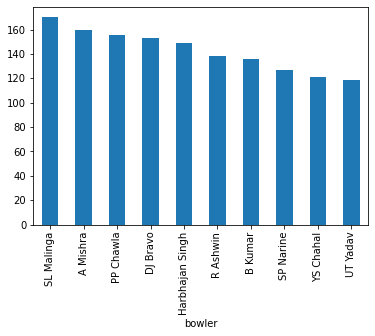

In [27]:
new_del.groupby('bowler')['player_dismissed'].agg('count').sort_values(ascending=False).head(10).plot(kind='bar')

The top 10 players with the highest number of sixes in IPL

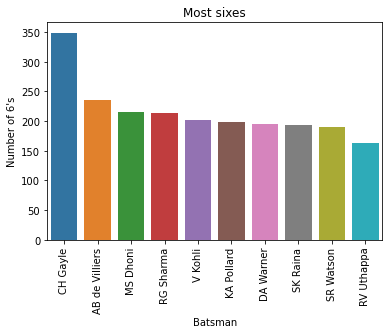

In [28]:
temp_df = delivery.groupby('batsman')['batsman_runs'].agg(lambda x:(x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).head(10).reset_index(drop=True)
temp_df
sns.barplot(x=temp_df['batsman'],y=temp_df['batsman_runs'],data=temp_df)

plt.title("Most sixes")
plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("Number of 6's")
plt.show()

TOP 10 MOST WICKETS BY BOWLER

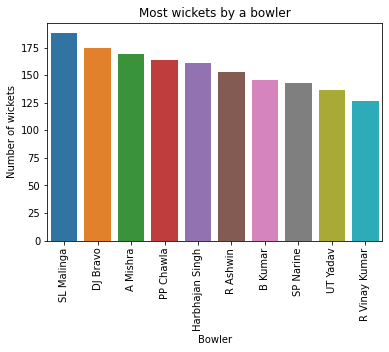

In [29]:
temp_df = delivery.groupby('bowler')['is_wicket'].agg('sum').reset_index().sort_values(by='is_wicket', ascending=False).reset_index(drop=True).head(10)
sns.barplot(x=temp_df['bowler'],y=temp_df['is_wicket'],data=temp_df)

plt.title("Most wickets by a bowler")
plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Number of wickets")
plt.show()


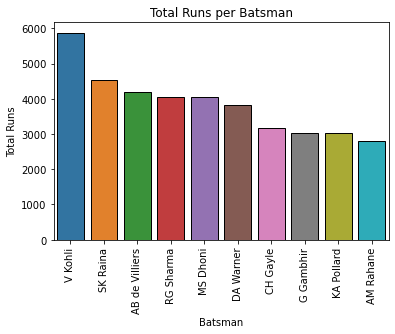

In [30]:
most_runs = delivery.groupby(['batsman','batting_team'])['batsman_runs'].sum().sort_values(ascending=False).reset_index().head(10)
runs = sns.barplot(x="batsman", y="batsman_runs", data=most_runs ,edgecolor=(0,0,0))
runs.set_ylabel('Total Runs')
runs.set_xlabel('Batsman')
plt.xticks(rotation=90)
plt.title("Total Runs per Batsman")
plt.show()

Total runs taken by the batsman

In [31]:
#converting datatype of date from object to date
match['date'] = pd.to_datetime(match['date'])
match.dtypes

id                          int64
city                       object
date               datetime64[ns]
player_of_match            object
venue                      object
neutral_venue               int64
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
eliminator                 object
method                     object
umpire1                    object
umpire2                    object
dtype: object

In [32]:
#since this is a very large dataset consisting of data from 2008, im going to choose only data from past 3 years 2018-2020
match = match[(match['date'].dt.year > 2017)]
match.describe()

,id,neutral_venue,result_margin
count,1.800000e+02,180.0,173.000000
mean,1.177420e+06,0.0,17.300578
std,3.343504e+04,0.0,21.549614
min,1.136561e+06,0.0,1.000000
25%,1.136606e+06,0.0,5.000000
50%,1.178406e+06,0.0,8.000000
75%,1.216506e+06,0.0,16.000000
max,1.237181e+06,0.0,118.000000


In [33]:
#create a dataframe consisting of matches played by CSK
d1 = match[match.team2 == 'Chennai Super Kings']
d2 = match[match.team1 == 'Chennai Super Kings']
dx = pd.concat([d1, d2])
dx.describe()

,id,neutral_venue,result_margin
count,4.700000e+01,47.0,47.000000
mean,1.175481e+06,0.0,13.297872
std,3.229574e+04,0.0,16.734389
min,1.136561e+06,0.0,1.000000
25%,1.136609e+06,0.0,5.000000
50%,1.178404e+06,0.0,7.000000
75%,1.216498e+06,0.0,10.000000
max,1.216544e+06,0.0,80.000000


In [34]:
#create a new column which shows the result of the match
dx.loc[dx['winner'] == 'Chennai Super Kings', 'MatchResult'] = "Won"
dx.loc[dx['winner'] != 'Chennai Super Kings', 'MatchResult'] = "Lost"
dx.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,MatchResult
636,1136561,Mumbai,2018-07-04,DJ Bravo,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore,Won
647,1136572,Chandigarh,2018-04-15,CH Gayle,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,Kings XI Punjab,runs,4.0,N,NaN,VA Kulkarni,CK Nandan,Lost
655,1136580,Hyderabad,2018-04-22,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,field,Chennai Super Kings,runs,4.0,N,NaN,VA Kulkarni,AK Chaudhary,Won
659,1136584,Bengaluru,2018-04-25,MS Dhoni,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,NJ Llong,VK Sharma,Won
668,1136593,Kolkata,2018-03-05,SP Narine,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,N,NaN,HDPK Dharmasena,A Deshmukh,Lost


In [35]:
#create a new column which shows what CSK did first i.e., batting or fielding
dx.loc[(dx['toss_winner'] == 'Chennai Super Kings') & (dx["toss_decision"] == 'field'), '1st'] = "fielding"
dx.loc[(dx['toss_winner'] == 'Chennai Super Kings') & (dx["toss_decision"] == 'bat'), '1st'] = "batting"
dx.loc[(dx['toss_winner'] != 'Chennai Super Kings') & (dx["toss_decision"] == 'field'), '1st'] = "batting"
dx.loc[(dx['toss_winner'] != 'Chennai Super Kings') & (dx["toss_decision"] == 'bat'), '1st'] = "fielding"
dx.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,MatchResult,1st
636,1136561,Mumbai,2018-07-04,DJ Bravo,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore,Won,fielding
647,1136572,Chandigarh,2018-04-15,CH Gayle,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,Kings XI Punjab,runs,4.0,N,NaN,VA Kulkarni,CK Nandan,Lost,fielding
655,1136580,Hyderabad,2018-04-22,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,field,Chennai Super Kings,runs,4.0,N,NaN,VA Kulkarni,AK Chaudhary,Won,batting
659,1136584,Bengaluru,2018-04-25,MS Dhoni,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,NJ Llong,VK Sharma,Won,fielding
668,1136593,Kolkata,2018-03-05,SP Narine,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,N,NaN,HDPK Dharmasena,A Deshmukh,Lost,batting


In [36]:
#create a dataframe consisting of the 2 categorical variables that are to be tested
dy = dx.pivot_table(index='1st', columns='MatchResult', aggfunc='size', fill_value=0)
dy

MatchResult,Lost,Won
1st,,
batting,9,7
fielding,11,20


We formulate the null and alternate hypotheses as below,

H0: The result of the match is independent on 1st batting or fielding

Ha: The result of the match is dependent on 1st batting or fielding

We chose the 5% significance level for our analysis i.e., α = 0.05. Each non-parametric test has its own specific assumptions. The assumptions of the Chi-square are as below

The data in the cells should be frequencies, or counts of cases rather than percentages or some other transformation of the data.
The categorical variables that are being tested are mutually exclusive.
There are 2 variables, and both are measured as categories, usually at the nominal level.
The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one.
Our data is in accordance with this assumptions.

In [37]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(dy)
print(stat, p)

1.1090641801075274 0.29228546548845175
